# Vector Chirped Z-transform (VCZT)


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_XY import Scalar_field_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY

In [3]:
size = 25 * um
x0 = np.linspace(-size / 2, size / 2, 512)
y0 = np.linspace(-size / 2, size / 2, 512)

focal = 16 * um
wavelength = 0.6328 * um


In [4]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0, 0),
              w0=(32 * um, 32 * um),
              z0=0 * um,
              A=1,
              theta=0. * degrees,
              phi=0 * degrees)


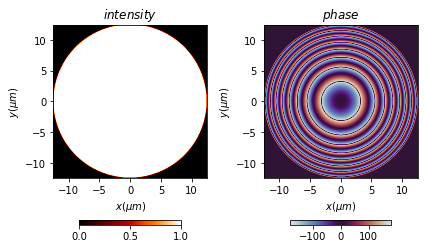

In [5]:
t = Scalar_mask_XY(x0, y0, wavelength)
t.lens(r0=(0, 0), focal=focal, radius=size / 2)


In [6]:
u1 = t * u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_polarization(u=u1, v=(1, 1j))


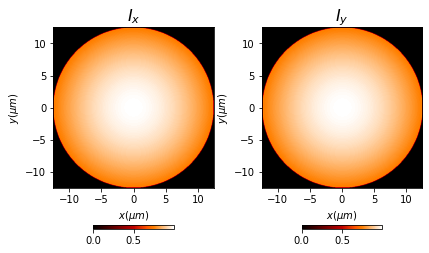

In [8]:
EM1.draw('intensities', logarithm=0)


## to value

In [9]:
x_out = 0.
y_out = 0.
z = focal


In [10]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out, verbose=True)
print(EM2_1D)


((12.01931943234928-2.910555097903726j), (2.910555097903726+12.01931943234928j), (-5.329070518200751e-15+3.2307490016592055e-14j))
CPU times: user 198 ms, sys: 47.6 ms, total: 246 ms
Wall time: 245 ms


## to x_field


In [11]:
size_out = 16 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 512)
y_out = 0.
z = focal


CPU times: user 765 ms, sys: 339 ms, total: 1.1 s
Wall time: 689 ms


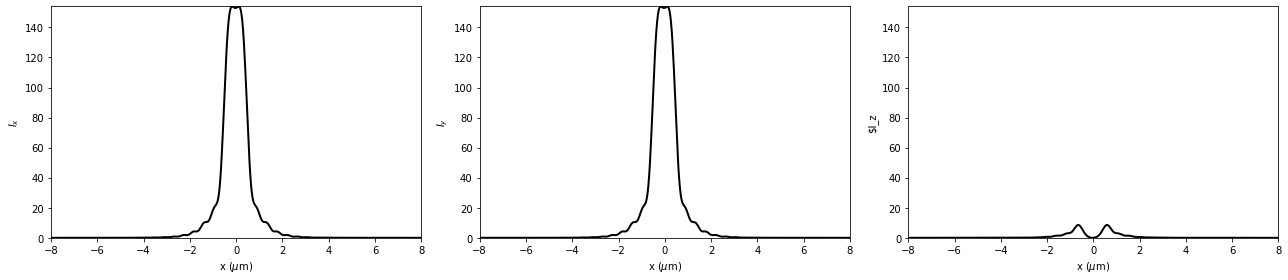

In [12]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out)
EM2_1D.draw('intensities');

## to z_field


In [13]:
x_out = 0.
y_out = 0.
z = np.linspace(focal - 4 * um - 6 * um, focal - 2 * um + 6 * um, 64)


In [14]:
%%time
EM2=EM1.CZT(z, x_out, y_out, verbose=False);


CPU times: user 11.1 s, sys: 304 ms, total: 11.4 s
Wall time: 11.4 s


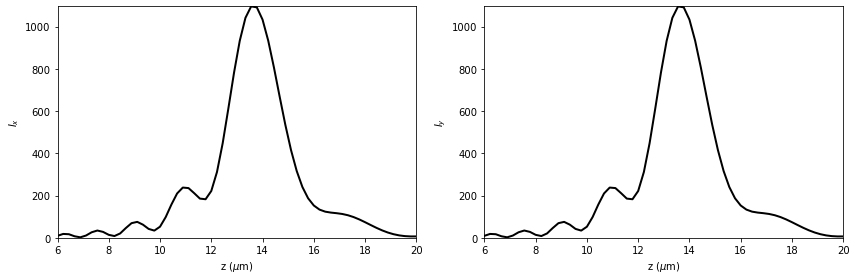

In [15]:
EM2.draw('intensities')


## to XZ_field


In [16]:
size_out = 5 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 128)
y_out = 0.
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 64)


In [17]:
%%time
EM2=EM1.CZT(z, x_out, y_out)


CPU times: user 10.3 s, sys: 1.38 s, total: 11.6 s
Wall time: 11.7 s


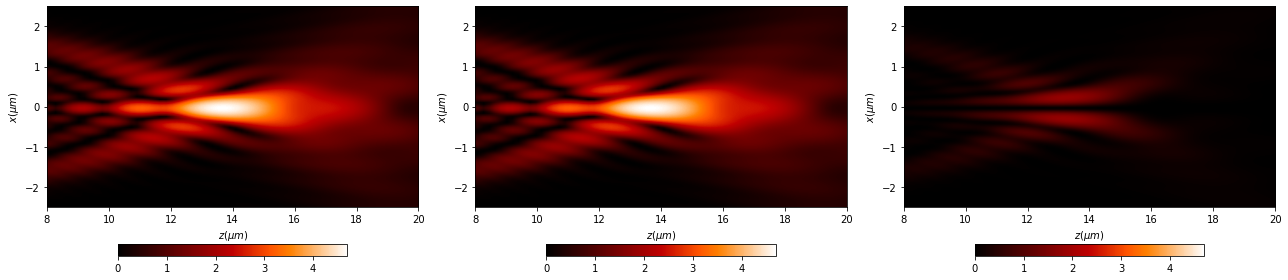

In [19]:
EM2.draw('intensities', logarithm=1e-1)


## to XY_field


In [21]:
size_out = 3 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 256)
y_out = np.linspace(-size_out / 2, size_out / 2, 256)
z = focal - 2


In [22]:
%%time
EM2=EM1.CZT(z, x_out, y_out)


CPU times: user 273 ms, sys: 48.1 ms, total: 321 ms
Wall time: 323 ms


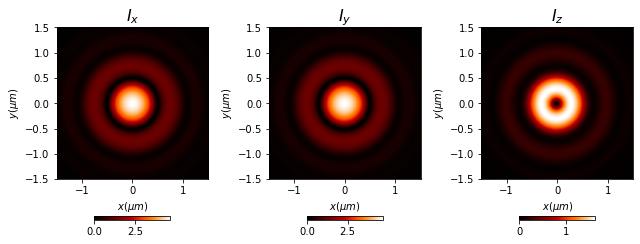

In [23]:
EM2.draw('intensities', logarithm=1e-1)


## to XYZ_field


In [29]:
size_out = 2 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 64)
y_out = np.linspace(-size_out / 2, size_out / 2, 64)
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 16)


In [30]:
%%time
EM2=EM1.CZT(z, x_out, y_out)


CPU times: user 2.97 s, sys: 407 ms, total: 3.37 s
Wall time: 3.38 s


<Figure size 432x288 with 0 Axes>

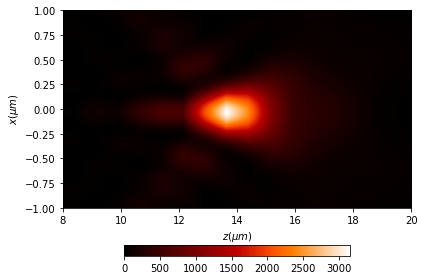

In [31]:
EM2.draw_XZ(y0=0, logarithm=False)